In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Midterm Review

Guidelines for the midterm:
1. This is an individual effort, do not work with others.
1. You can copy code from the notes or your own homework but other sources is considered plaigerism.
1. Do not use piazza for the duration of the exam, it will be frozen!
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.  In particular this means we will not debug your code.
1. Late turn in of the midterm will result in a 10% reduction every **HOUR** that it is late.  If you feel that there is a special circumstance that warrants consideration tells us BEFORE the Tuesday (and more so before the exam starts).

Good luck!

## Question 1
Euler's constant $\gamma = 0.5772156\ldots$ is defined as the limit

$$ \gamma = \lim_{n \rightarrow \infty} \gamma_n$$

where 

$$\gamma_n = 1 + \frac{1}{2} + \frac{1}{3} + \cdots + \frac{1}{n} - \ln n.$$

Assuming that $\gamma - \gamma_n \approx c n^{-d},~n \rightarrow \infty$, for some constants $c$ and $d > 0$, determine $c$ and $d$ by experimenting computationally.

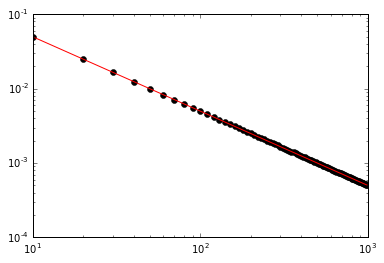

In [7]:
### CODE HERE
def gamma_n(n):
    gamma_sum=0.0
    for i in xrange(1, n+1):
        gamma_sum +=1.0/float(i)
    return gamma_sum - numpy.log(n)
N = numpy.array(range(10, 1000, 10))
error = numpy.empty(N.shape[0])
for(i, n) in enumerate(N):
    error[i]=numpy.abs(numpy.euler_gamma - gamma_n(n))
A = numpy.ones((N.shape[0],2))
A[:, 1] = -numpy.log(N)
coeff = numpy.linalg.lstsq(A, numpy.log(error))[0]
c = numpy.exp(coeff[0])
d = coeff[1]

fig = plt.figure(0)
axes = fig.add_subplot(1, 1, 1)
axes.loglog(N, error, 'ko')
axes.plot(N, c*N**(-d),'r-')

plt.show()

## Question 2
Let $f(x) = (n+1)x - 1$.  The iteration

$$x_k = f(x_{k-1}), ~k=1,2,\ldots,K; ~x_0 = 1/n$$

in exact arithmetic converges to the fixed point $1/n$ in one step.  Explain why this is.  Now compute this in finite arithmetic with $n=1,2,3,4,5$ and `K= xrange(10:50:10)` and explain what you observe.

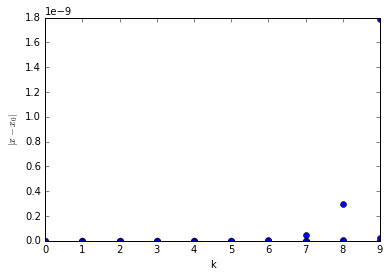

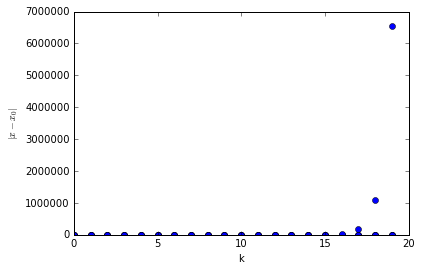

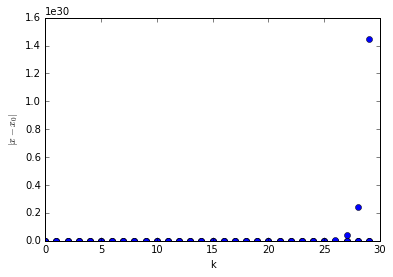

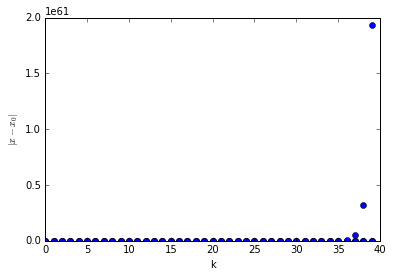

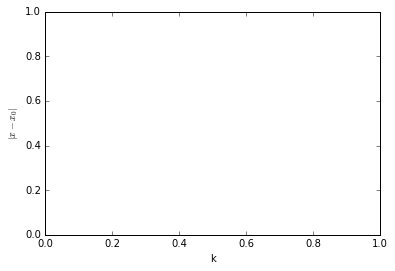

In [13]:
f = lambda n, x: (n+1.0) *x -1.0
axes = []
for i in xrange(5):
    fig = plt.figure()
    axes.append(fig.add_subplot(1,1,1))
    axes[i].set_xlabel("k")
    axes[i].set_ylabel("$|x -x_0|$")
    
K = range(10, 50, 10)
for n in xrange(1, 6):
    x = 1.0/float(n)
    
    for i in xrange(len(K)):
        for k in xrange(K[i]):
            x = f(n,x)
            axes[i].plot(k, numpy.abs(x-1.0/n), 'bo')
plt.show()


## Question 3
Consider the equation

$$\frac{x}{2} - \sin x = 0$$

Show that the only positive root is located in the interval $x\in[\frac{1}{2}\pi,\pi]$.

Compute the root to $10^{-7}$, $10^{-15}$ accuracy using
1. Bisection with starting values $[\frac{1}{2} \pi, \pi]$
1. Secant method with same starting values
1. Newton's method with $x_0 = \frac{1}{2} \pi$.

Write a function that returns the number of iterations needed for a given tolerance.

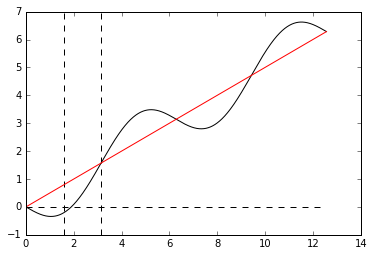

In [18]:
### CODE HERE
f = lambda x: x/2.0 - numpy.sin(x)
x = numpy.linspace(0.0, 4.0*numpy.pi, 1000)
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, f(x),'k')
axes.plot(x, numpy.zeros(x.shape[0]), '--k')
axes.plot([numpy.pi/2.0, numpy.pi/2.0], [-1, 7], '--k')
axes.plot([numpy.pi, numpy.pi], [-1, 7], '--k')
axes.plot(x, 0.5*x, 'r')

plt.show()

## Question 4
Bernoulli's equation for fluid flow in an open channel with a small bump is

$$\frac{Q^2}{2gw^2h_0^2} + h_0 = \frac{Q^2}{2gw^2h^2} + h + H$$

where

$Q = 1.2~\text{m}^3/\text{s} =$ volume rate of flow

$g = 9.81 \text{m}/\text{s}^2 = $ gravitational acceleration

$w = 1.8 \text{m} = $ width of channel

$h_0 = 0.6 \text{m} = $ upstream water level

$H = 0.075 \text{m} = $ height of bump

$h = $ water level above the bump.

Determine $h$ to `1e-3` precision.

In [ ]:
def f(h):
    Q=1.2
    g = 9.81

## Question 5
The *Littlewood-Salem-Izumi* constant $\alpha_0$ is defined as the unique solution where $0 < \alpha < 1$ of 

$$ \int^{3 \pi / 2}_{0} \frac{\cos t}{t^\alpha} dt = 0.$$

See http://www.jstor.org/stable/40590375?seq=4#page_scan_tab_contents

**(a)** If we wanted to use Newton's method and Gauss-Legendre 2-point quadrature to compute $\alpha_0$ what functions $f(x)$ and $f'(x)$ should we define to run the Newton iteration?  Note that here we are using a single partition of the interval $[0, 3 \pi / 2]$ for the quadrature rule.

**(b)** Implement the above scheme to compute $\alpha$ by writing a function that takes in an initial guess and a tolerance that sets the stopping criteria such that if the difference between subsequent iterates is below this tolerance the iteration will stop.

In [3]:
### CODE HERE

## Question 6
Find the 2nd order, central difference based  2-dimensional differential quantities.  Make sure to consider the case where $\Delta x \neq \Delta y$ and use notation such that

$$f(x_i, y_j) = f_{i,j}$$

**(a)** $\nabla \cdot \vec{f}(\vec{x}) = \text{div}( \vec{f}(\vec{x}) ):= \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y}$

**(b)** $\Delta( f ):= \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$

## Question 7
Derive the first central difference approximation for $f^{(4)}(x)$ from the Taylor series.

In [5]:
### CODE HERE

## Question 8

Let $g(x):=\cos(x)+\sin(2x) \quad \text{ with } x\in[-2\pi,2\pi]$.

1. Compute an interpolating polynomial from samples of $g$ taken at $y_k=  \frac{\pi}{4}+ k\cdot \frac{\pi}{2} \text{ for } k\in [-4,3] \cap \mathbb Z$.
2. Evaluate the interpolating polynomial at $x_k = k\cdot \frac{\pi}{2}\text{ for } k\in [-4,4] \cap \mathbb Z$ and use the values to compute finite differences:
    - forward differences
    - backward finite differences
    - central differences
    
3. Compute the analytical derivative $g'$ of $g$.
4. Compute an interpolating polynomial from samples $g'$ taken at $x_k$ and evaluate the resulting polynomial at $y_k$.

Do the finite differences of the interpolating polynomial of $g$ equal point values of the interpolating polynomial of the derivative, $g'$?

In [6]:
### CODE HERE